In [1]:
import torch
from inferenceRacingLineAI import get_racing_line
from trainRacingLineAI import run_pipeline, run_inference

In [2]:
# From Inference File (From Coords or Image)
# get_racing_line(data_dir="./data/testing_layouts/", data_type="coords", model_path="./models/300_all_racing_line_lstm.pt")

In [3]:
config = {
    "seed": 42,
    "input_size": 6,
    #model params
    "hidden1":128,
    "kern_size1":3,
    "kern_size2":3,
    "padding1": 2,
    "padding2": 4,
    "dilation1": 2,
    "dilation2": 4,
    "pos_head_sz": 128,
    "cont_head_sz": 128,
    #administrative stuff
    "device":"cuda",
    "input_cols": ["left_x","left_y","left_z","right_x","right_y","right_z"],
    "output_pos_cols": ["x","y","z"],
    "output_cont_cols": ["speed", "gas", "brake", "side_left", "side_right"],
    "patience": 10,
    "train_data_path": "./data/extracted_track_data/",
    #"train_data_path": "./data/testing_layouts/",
    "test_data_path": "./data/testing_layouts/",
    "model_save_path": "./models/testing_racing_proto_neo_cerberus.pt",
    "pin_memory": True,
    #Training info,
    "num_epochs": 10,
    "long_epochs": 4,
    "medium_epochs": 3,
    "train_split": 0.8,
    "learning_rate": 0.001,
    "batch_size": 128,
    "long_seq_len": 600,
    "med_seq_len": 300,
    "short_seq_len": 150
}

In [4]:
run_pipeline(config)

Preparing dataset...
Total sequences loaded: 376433
Initializing model...
Training started...


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10:   0%|          | 0/2353 [00:00<?, ?it/s]

Epoch 2/10:   0%|          | 0/2353 [00:00<?, ?it/s]

Epoch 3/10:   0%|          | 0/2353 [00:00<?, ?it/s]

Epoch 4/10:   0%|          | 0/2353 [00:00<?, ?it/s]

Epoch 5/10:   0%|          | 0/2353 [00:00<?, ?it/s]

Epoch 6/10:   0%|          | 0/2353 [00:00<?, ?it/s]

Epoch 7/10:   0%|          | 0/2353 [00:00<?, ?it/s]

Epoch 8/10:   0%|          | 0/2353 [00:00<?, ?it/s]

Epoch 9/10:   0%|          | 0/2353 [00:00<?, ?it/s]

Epoch 10/10:   0%|          | 0/2353 [00:00<?, ?it/s]

Training complete. Model saved to ./models/testing_racing_proto_neo_cerberus.pt


Loading model...
Loading unseen layouts from: ./data/testing_layouts/
Found 1 layout files.

[1/1] Predicting layout: ks_barcelona_layout_gp_Processed_Data.csv
Track is circular: True


[1/1]:   0%|          | 0/2928 [00:00<?, ?it/s]

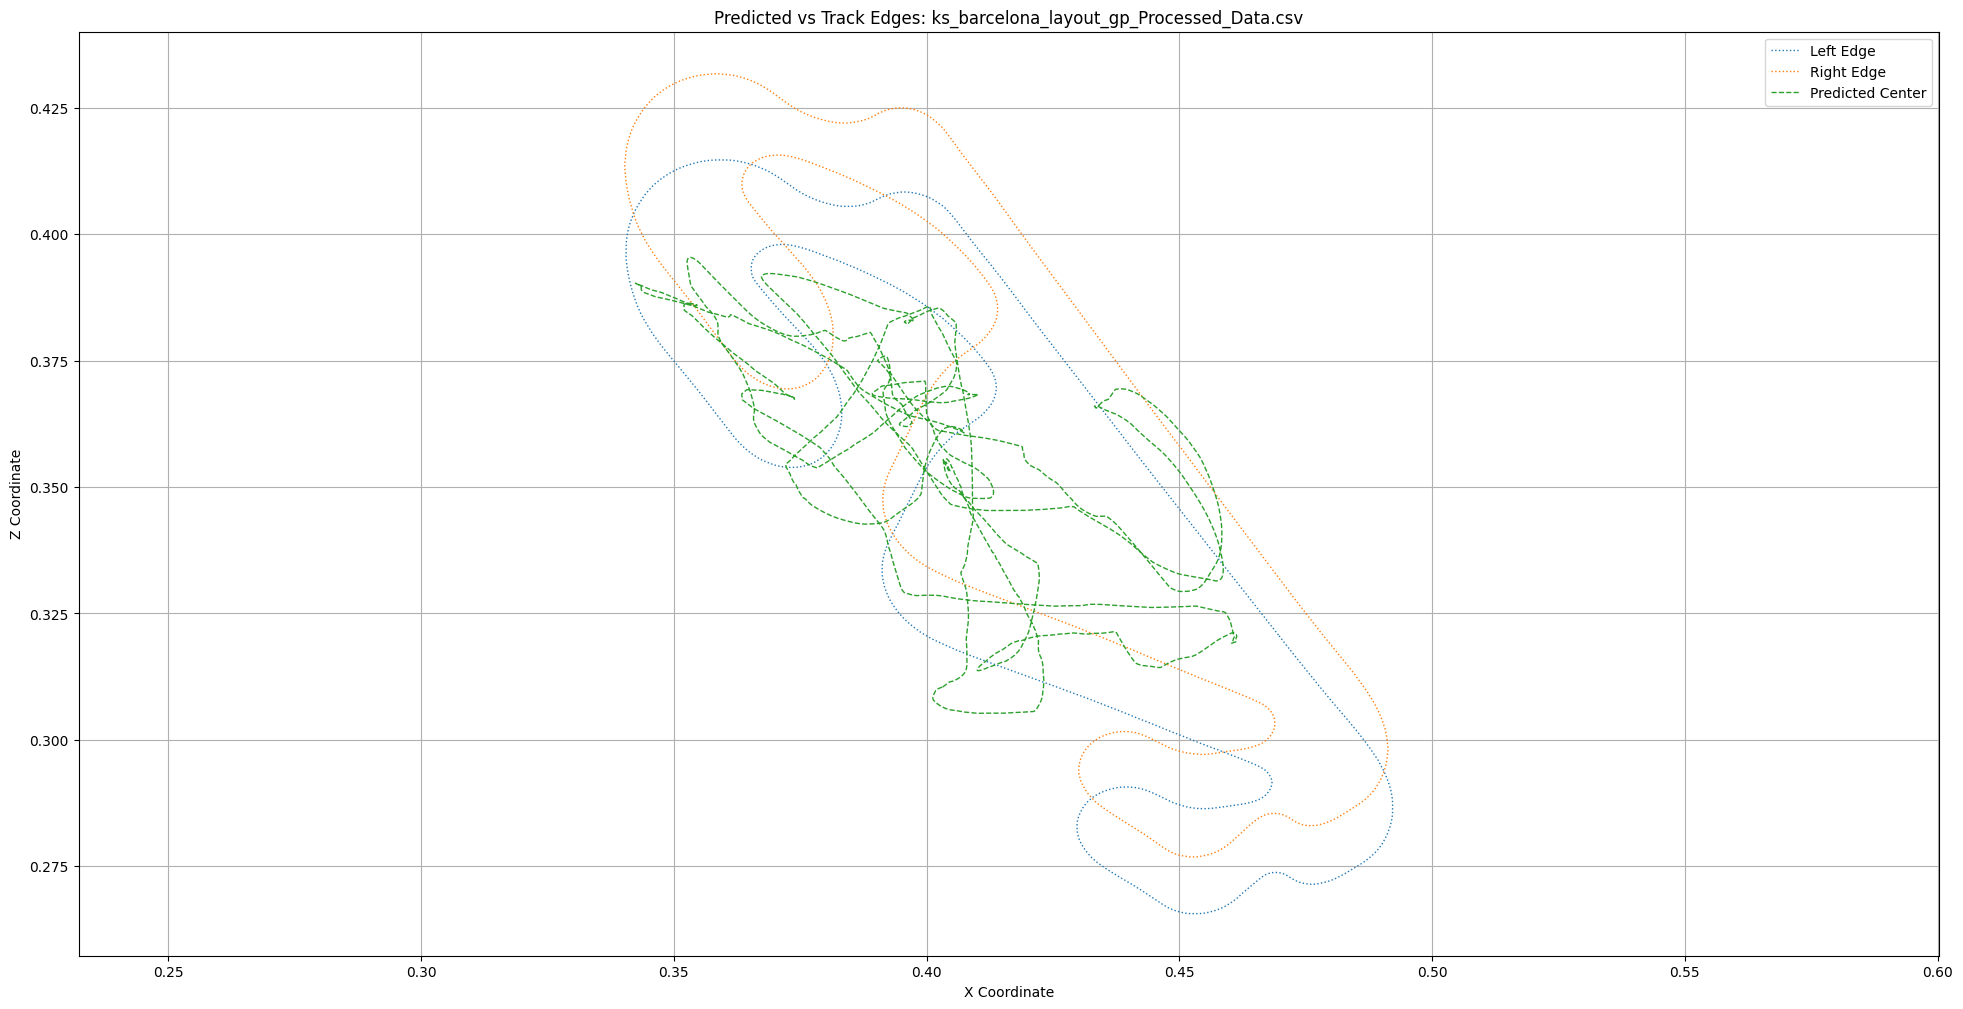

In [5]:
get_racing_line(config["test_data_path"], data_type="coords", model_path=config["model_save_path"], seq_len=150)